<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [3]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

**1. Загрузить датасет**

In [4]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [8]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Ответ:** пустых значений нет.

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [5]:
class_count = dataset.groupby('Class').count()['Time']
class_count

Class
0    284315
1       492
Name: Time, dtype: int64

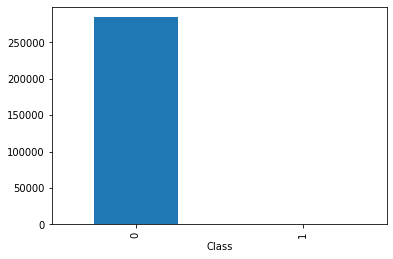

In [9]:
class_count.plot(kind = 'bar')

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [12]:
import matplotlib.pyplot as plt

In [13]:
dataset.groupby('Class').sum()['Amount']

Class
0    2.510246e+07
1    6.012797e+04
Name: Amount, dtype: float64

(array([296.,  29.,  61.,   9.,  15.,  11.,   8.,  12.,   8.,   1.,   5.,
          2.,   5.,   2.,   3.,   2.,   3.,   4.,   3.,   2.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   2.,   2.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.    ,   42.5174,   85.0348,  127.5522,  170.0696,  212.587 ,
         255.1044,  297.6218,  340.1392,  382.6566,  425.174 ,  467.6914,
         510.2088,  552.7262,  595.2436,  637.761 ,  680.2784,  722.7958,
         765.3132,  807.8306,  850.348 ,  892.8654,  935.3828,  977.9002,
        1020.4176, 1062.935 , 1105.4524, 1147.9698, 1190.4872, 1233.0046,
        1275.522 , 1318.0394, 1360.5568, 1403.0742, 1445.5916, 1488.109 ,
        1530.6264, 1573.1438, 1615.6612, 1658.1786, 1700.696 , 1743.2134,
        1785.7308, 1828.2482, 1870.7656, 1913.283 , 1955.8004, 1998.3178,
        2040.8352, 2083.3526, 2125.87  ]),
 <a list of 50 Patch ob

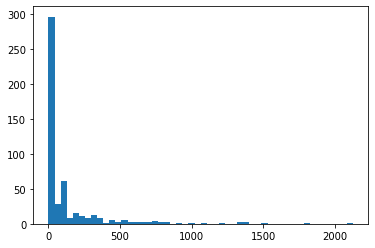

In [16]:
plt.hist(dataset[dataset['Class'] == 1]['Amount'], 50)

(array([2.75533e+05, 5.98600e+03, 1.53200e+03, 6.26000e+02, 2.26000e+02,
        1.44000e+02, 9.20000e+01, 6.90000e+01, 3.30000e+01, 2.20000e+01,
        1.00000e+01, 1.10000e+01, 5.00000e+00, 5.00000e+00, 5.00000e+00,
        5.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.    ,   513.8232,  1027.6464,  1541.4696,  2055.2928,
         2569.116 ,  3082.9392,  3596.7624,  4110.5856,  4624.4088,
         5138.232 ,  5652.0552,  6165.8784,  6679.7016,  7193.5248,
         7707.348 ,  8221.1712,  8734.9944,  9248.8176,  9762.64

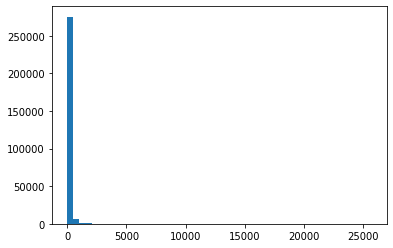

In [17]:
plt.hist(dataset[dataset['Class'] == 0]['Amount'], 50)

**5. Построить графики histograms для всех значений**

In [10]:
import matplotlib.pyplot as plt

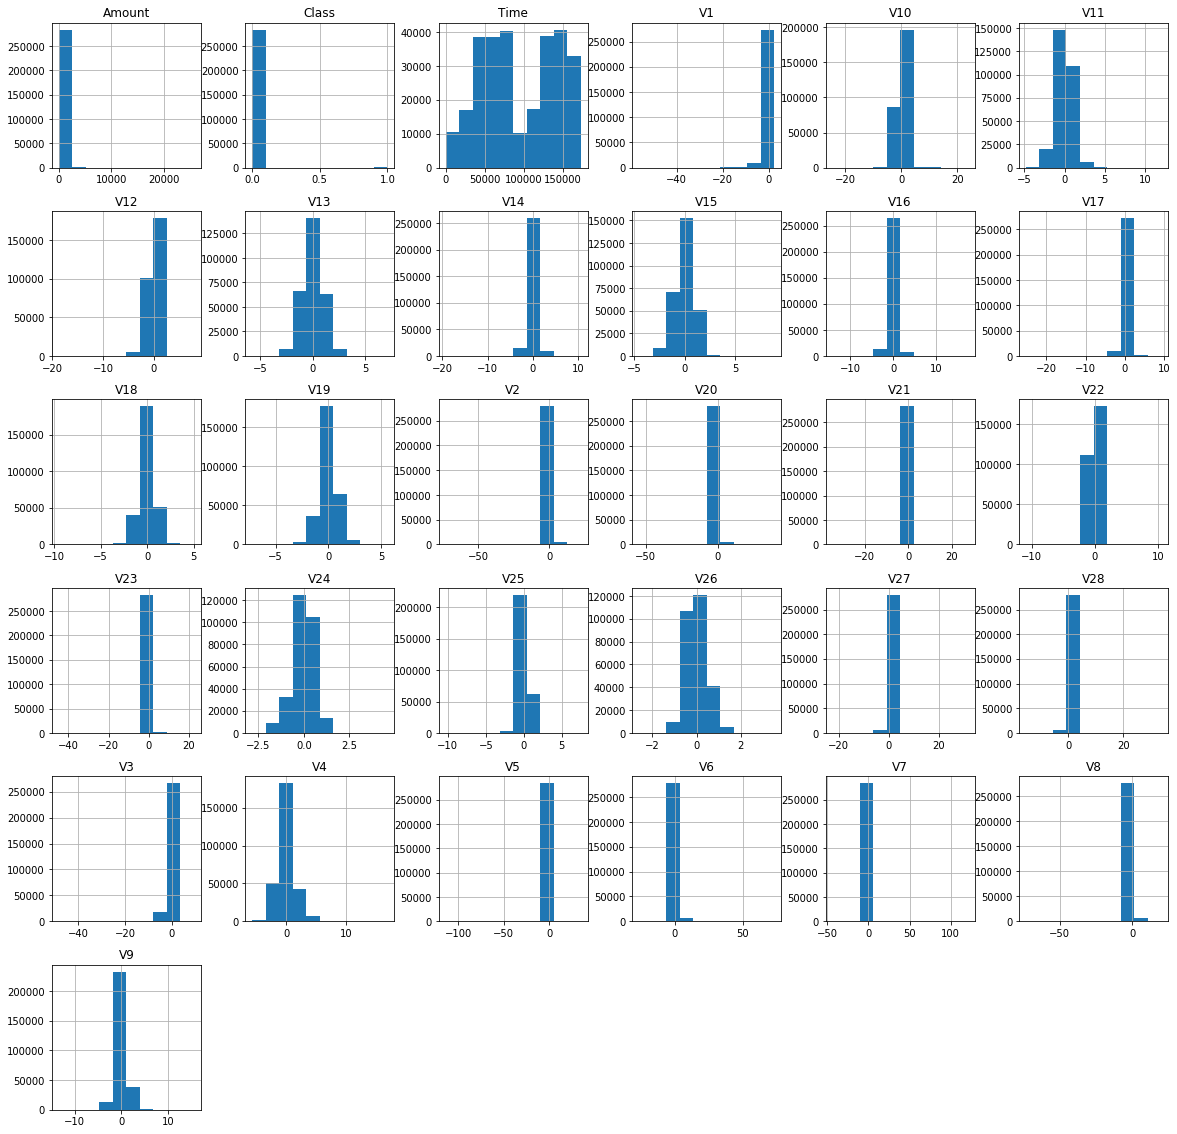

In [11]:
dataset.hist(figsize=(20,20))
plt.show()

**6. Построить матрицу корреляций для всех значений**

In [15]:
import seaborn as sns

In [21]:
corr_mtrx = dataset.corr().round(2)
# corr_mtrx

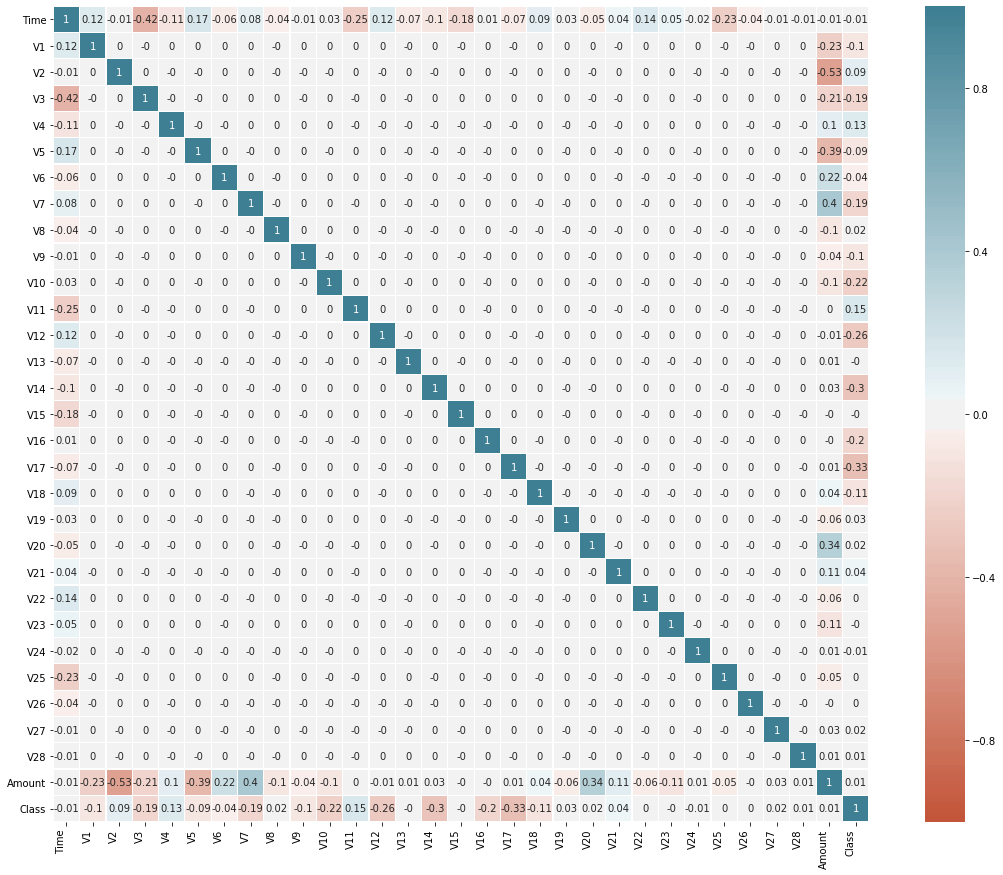

In [25]:
plt.figure(figsize=(20,15))

mtrx = sns.heatmap(corr_mtrx, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,square=True, linewidths=0.2)

i, k = mtrx.get_ylim()
mtrx.set_ylim(i+0.5, k-0.5)

mtrx.set_xticklabels(mtrx.get_xticklabels(), horizontalalignment='right');

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

Модель Random Forest

In [6]:
from sklearn import preprocessing

In [7]:
output_y = dataset.iloc[:,27:]
input_x = dataset

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

V27       270740
Amount     13688
Class        379
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [10]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Как делать classification report:

In [11]:
from sklearn.metrics import classification_report

In [12]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4146
           1       1.00      0.96      0.98       131
           2       1.00      1.00      1.00     81166

    accuracy                           1.00     85443
   macro avg       1.00      0.99      0.99     85443
weighted avg       1.00      1.00      1.00     85443



0.9999414814554732

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [13]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(dataset)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [14]:
output_y = dataset.iloc[:,27:]
input_x = df_norm

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

V27       270740
Amount     13688
Class        379
dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4107
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00     81216

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443



1.0

**Ответ:** с нормализованными данными точнее.

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,
                                                 Y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [21]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

/Users/fixed/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Количество элементов до операции: 199364
Количество элементов после операции: 568530
